# Modeling #metoo

In [11]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm, linear_model
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

pd.set_option('display.max_columns', 500)

In [12]:
df = pd.read_csv('./me_too.csv')

In [13]:
df.head()

,Unnamed: 0,Unnamed: 0.1,StartDate,EndDate,q0001,q0002,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0013,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight,q0004_0001_Father or father figure(s),target,marital_status,has_kids_u18,has_kids_o18,sex_orient,no_kids,race,education
0,0,0,5/10/18 4:01,5/10/18 4:06,3,3,0,0,1,0.0,NaN,1.0,3,3,5,5,1,1,5,4,4,1,5,0,0,1,0,0,0,0,0,1,1,0,0,3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,0,0,0,0,None of the above,No,Never married,Not selected,Not selected,No children,Gay,Hispanic,College graduate,New York,"$0-$9,999",Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026,0,0.0,NaN,0,0,3,1,4,1
1,1,1,5/10/18 6:30,5/10/18 6:53,3,3,0,0,0,0.0,NaN,1.0,4,5,2,3,1,3,1,5,1,4,0,0,1,0,0,0,0,0,1,1,0,0,0,5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,None of the above,No,Widowed,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,Some college,Ohio,"$50,000-$74,999",East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120,1,0.0,4.0,0,1,2,0,3,3
2,2,2,5/10/18 7:02,5/10/18 7:09,4,2,0,0,0,0.0,NaN,0.0,5,5,4,3,2,5,1,3,4,3,1,0,0,0,0,0,0,0,0,1,0,0,0,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Not selected,1.0,0.0,0.0,0.0,Not selected,0.0,0.0,0.0,0.0,0.0,0.0,Other (please specify),NaN,4.0,0.0,1.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,None of the above,No,Married,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,College graduate,Michigan,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746,1,0.0,1.0,0,1,2,0,3,1
3,3,3,5/10/18 7:27,5/10/18 7:31,4,2,1,1,0,0.0,NaN,0.0,4,4,4,3,3,5,1,1,3,1,1,0,0,0,0,0,0,0,0,0,0,0,1,5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,Not selected,No answer,Married,Not selected,"Yes, one or more children 18 or older",Not selected,No answer,White,Some college,Indiana,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,No answer,0.600640,1,NaN,1.0,0,1,0,0,3,3
4,4,4,5/10/18 7:35,5/10/18 7:42,4,4,0,1,0,0.0,NaN,1.0,5,4,1,2,2,4,1,5,3,2,4,0,1,0,0,0,0,0,0,0,0,0,0,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Not selected,0.0,NaN,1.0,0.0,Not selected,0.0,0.0,0.0,0.0,0.0,1.0,Not selected,NaN,4.0,1.0,0.0,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,None of the above,No,Never married,Not selected,Not selected,No children,Straight,White,College graduate,Ohio,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400,0,0.0,NaN,0,0,2,1,3,1


In [14]:
df.drop(columns = 'Unnamed: 0' , axis=1, inplace=True)

In [15]:
df.head(1)

,Unnamed: 0.1,StartDate,EndDate,q0001,q0002,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0013,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight,q0004_0001_Father or father figure(s),target,marital_status,has_kids_u18,has_kids_o18,sex_orient,no_kids,race,education
0,0,5/10/18 4:01,5/10/18 4:06,3,3,0,0,1,0.0,NaN,1.0,3,3,5,5,1,1,5,4,4,1,5,0,0,1,0,0,0,0,0,1,1,0,0,3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,0,0,0,0,None of the above,No,Never married,Not selected,Not selected,No children,Gay,Hispanic,College graduate,New York,"$0-$9,999",Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026,0,0.0,NaN,0,0,3,1,4,1


In [16]:
df.drop(columns = 'Unnamed: 0.1', axis=1, inplace=True)

In [17]:
df.head(2)

,StartDate,EndDate,q0001,q0002,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0013,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight,q0004_0001_Father or father figure(s),target,marital_status,has_kids_u18,has_kids_o18,sex_orient,no_kids,race,education
0,5/10/18 4:01,5/10/18 4:06,3,3,0,0,1,0.0,NaN,1.0,3,3,5,5,1,1,5,4,4,1,5,0,0,1,0,0,0,0,0,1,1,0,0,3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,0,0,0,0,None of the above,No,Never married,Not selected,Not selected,No children,Gay,Hispanic,College graduate,New York,"$0-$9,999",Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026,0,0.0,NaN,0,0,3,1,4,1
1,5/10/18 6:30,5/10/18 6:53,3,3,0,0,0,0.0,NaN,1.0,4,5,2,3,1,3,1,5,1,4,0,0,1,0,0,0,0,0,1,1,0,0,0,5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,None of the above,No,Widowed,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,Some college,Ohio,"$50,000-$74,999",East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120,1,0.0,4.0,0,1,2,0,3,3


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Columns: 105 entries, StartDate to education
dtypes: float64(34), int64(46), object(25)
memory usage: 1.3+ MB


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
q0001,1615.0,3.232198,0.750847,0.000000,3.00000,3.000000,4.000000,4.000000
q0002,1615.0,2.473065,0.907964,0.000000,2.00000,3.000000,3.000000,4.000000
q0004_0002,1615.0,0.405573,0.491155,0.000000,0.00000,0.000000,1.000000,1.000000
q0004_0003,1615.0,0.349226,0.476873,0.000000,0.00000,0.000000,1.000000,1.000000
q0004_0004,1615.0,0.187616,0.390526,0.000000,0.00000,0.000000,0.000000,1.000000
q0004_0005,1615.0,0.346130,0.475883,0.000000,0.00000,0.000000,1.000000,1.000000
q0004_0006,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q0005,1602.0,0.596130,0.490825,0.000000,0.00000,1.000000,1.000000,1.000000
q0007_0001,1615.0,3.854489,1.477381,0.000000,3.00000,4.000000,5.000000,5.000000
q0007_0002,1615.0,3.886068,1.402122,0.000000,3.00000,4.000000,5.000000,5.000000


In [20]:
df.dtypes

StartDate                                 object
EndDate                                   object
q0001                                      int64
q0002                                      int64
q0004_0002                                 int64
q0004_0003                                 int64
q0004_0004                                 int64
q0004_0005                               float64
q0004_0006                               float64
q0005                                    float64
q0007_0001                                 int64
q0007_0002                                 int64
q0007_0003                                 int64
q0007_0004                                 int64
q0007_0005                                 int64
q0007_0006                                 int64
q0007_0007                                 int64
q0007_0008                                 int64
q0007_0009                                 int64
q0007_0010                                 int64
q0007_0011          

In [21]:
df.replace('NaN', 0)

,StartDate,EndDate,q0001,q0002,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0013,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight,q0004_0001_Father or father figure(s),target,marital_status,has_kids_u18,has_kids_o18,sex_orient,no_kids,race,education
0,5/10/18 4:01,5/10/18 4:06,3,3,0,0,1,0.0,NaN,1.0,3,3,5,5,1,1,5,4,4,1,5,0,0,1,0,0,0,0,0,1,1,0,0,3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,0,0,0,0,None of the above,No,Never married,Not selected,Not selected,No children,Gay,Hispanic,College graduate,New York,"$0-$9,999",Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026,0,0.0,NaN,0,0,3,1,4,1
1,5/10/18 6:30,5/10/18 6:53,3,3,0,0,0,0.0,NaN,1.0,4,5,2,3,1,3,1,5,1,4,0,0,1,0,0,0,0,0,1,1,0,0,0,5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,None of the above,No,Widowed,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,Some college,Ohio,"$50,000-$74,999",East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120,1,0.0,4.0,0,1,2,0,3,3
2,5/10/18 7:02,5/10/18 7:09,4,2,0,0,0,0.0,NaN,0.0,5,5,4,3,2,5,1,3,4,3,1,0,0,0,0,0,0,0,0,1,0,0,0,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Not selected,1.0,0.0,0.0,0.0,Not selected,0.0,0.0,0.0,0.0,0.0,0.0,Other (please specify),NaN,4.0,0.0,1.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,None of the above,No,Married,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,College graduate,Michigan,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746,1,0.0,1.0,0,1,2,0,3,1
3,5/10/18 7:27,5/10/18 7:31,4,2,1,1,0,0.0,NaN,0.0,4,4,4,3,3,5,1,1,3,1,1,0,0,0,0,0,0,0,0,0,0,0,1,5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,Not selected,No answer,Married,Not selected,"Yes, one or more children 18 or older",Not selected,No answer,White,Some college,Indiana,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,No answer,0.600640,1,NaN,1.0,0,1,0,0,3,3
4,5/10/18 7:35,5/10/18 7:42,4,4,0,1,0,0.0,NaN,1.0,5,4,1,2,2,4,1,5,3,2,4,0,1,0,0,0,0,0,0,0,0,0,0,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Not selected,0.0,NaN,1.0,0.0,Not selected,0.0,0.0,0.0,0.0,0.0,1.0,Not selected,NaN,4.0,1.0,0.0,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,None of the above,No,Never married,Not selected,Not selected,No children,Straight,White,College graduate,Ohio,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400,0,0.0,NaN,0,0,2,1,3,1
5,5/10/18 8:25,5/10/18 8:34,4,3,0,0,0,0.0,NaN,1.0,1,5,4,3,2,5,1,4,5,2,1,0,0,0,0,0,0,0,0,0,0,0,1,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Other (please specify),0.0,0.0,1.0,0.0,Not selected,1.0,0.0,0.0,0.0,0.0,0.0,Not selected,NaN,1.0,0.0,0.0,5,

In [22]:
df.fillna(0, inplace=True)

In [23]:
df.head(3)

,StartDate,EndDate,q0001,q0002,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0013,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight,q0004_0001_Father or father figure(s),target,marital_status,has_kids_u18,has_kids_o18,sex_orient,no_kids,race,education
0,5/10/18 4:01,5/10/18 4:06,3,3,0,0,1,0.0,0.0,1.0,3,3,5,5,1,1,5,4,4,1,5,0,0,1,0,0,0,0,0,1,1,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0,0,0,None of the above,No,Never married,Not selected,Not selected,No children,Gay,Hispanic,College graduate,New York,"$0-$9,999",Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026,0,0.0,0.0,0,0,3,1,4,1
1,5/10/18 6:30,5/10/18 6:53,3,3,0,0,0,0.0,0.0,1.0,4,5,2,3,1,3,1,5,1,4,0,0,1,0,0,0,0,0,1,1,0,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,None of the above,No,Widowed,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,Some college,Ohio,"$50,000-$74,999",East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120,1,0.0,4.0,0,1,2,0,3,3
2,5/10/18 7:02,5/10/18 7:09,4,2,0,0,0,0.0,0.0,0.0,5,5,4,3,2,5,1,3,4,3,1,0,0,0,0,0,0,0,0,1,0,0,0,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Not selected,1.0,0.0,0.0,0.0,Not selected,0.0,0.0,0.0,0.0,0.0,0.0,Other (please specify),0.0,4.0,0.0,1.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,None of the above,No,Married,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,College graduate,Michigan,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746,1,0.0,1.0,0,1,2,0,3,1


In [24]:
X = df.drop(columns = ['StartDate', 'EndDate','q0022','q0021_0004','q0024','q0025_0001','q0025_0002','q0025_0003','q0026',
                       'q0028','q0029','q0030','q0034','q0035','q0036','race2','racethn4','educ3',                          
                       'educ4','age3','kids','orientation','q0010_0008', 'q0011_0005', 'q0012_0007','target' ])                        
y = df['q0022']

In [25]:
X.dtypes[X.dtypes=='object']

Series([], dtype: object)

In [26]:
X.columns

Index(['q0001', 'q0002', 'q0004_0002', 'q0004_0003', 'q0004_0004',
       'q0004_0005', 'q0004_0006', 'q0005', 'q0007_0001', 'q0007_0002',
       'q0007_0003', 'q0007_0004', 'q0007_0005', 'q0007_0006', 'q0007_0007',
       'q0007_0008', 'q0007_0009', 'q0007_0010', 'q0007_0011', 'q0008_0001',
       'q0008_0002', 'q0008_0003', 'q0008_0004', 'q0008_0005', 'q0008_0006',
       'q0008_0007', 'q0008_0008', 'q0008_0009', 'q0008_0010', 'q0008_0011',
       'q0008_0012', 'q0009', 'q0010_0001', 'q0010_0002', 'q0010_0003',
       'q0010_0004', 'q0010_0005', 'q0010_0006', 'q0010_0007', 'q0011_0001',
       'q0011_0002', 'q0011_0003', 'q0011_0004', 'q0012_0001', 'q0012_0002',
       'q0012_0003', 'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0013',
       'q0014', 'q0015', 'q0017', 'q0018', 'q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
       'q0020_0001', 'q0020_0002', 'q0020_0003', 'q0020_0004', 'q0020_0005',
       'q0020_0006', 'q0021_00

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y)

In [28]:
print(y_train.value_counts())
print(y_test.value_counts())

No           1081
Yes           108
No answer      22
Name: q0022, dtype: int64
No           361
Yes           36
No answer      7
Name: q0022, dtype: int64


In [29]:
ada = AdaBoostClassifier()
lr = LogisticRegression()
extra_tree = ExtraTreesClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
nb = MultinomialNB()
svc = svm.SVC()

In [30]:
cross_val_score(ada, X_train, y_train, cv=5).mean()

0.8414039653254124

In [31]:
cross_val_score(nb, X_train, y_train, cv=5).mean()

0.8571579389837819

In [32]:
ada_model = ada.fit(X_train, y_train)

In [33]:
ada_score = ada.score(X_test, y_test)
print(ada_score)

0.7920792079207921


In [37]:
feat_importances = pd.DataFrame(ada_model.feature_importances_, X_test.columns)

In [41]:
feat_importances.shape

(79, 2)

In [42]:
feat_importances.head()

,0,feat_imp
q0001,0.08,q0001
q0002,0.00,q0002
q0004_0002,0.04,q0004_0002
q0004_0003,0.00,q0004_0003
q0004_0004,0.00,q0004_0004


In [40]:
feat_importances['feat_imp'] = X_test.columns

In [45]:
feat_importances.rename(columns={'0':'feat_imp', 'feat_imp':'question_num'})

,0,question_num
q0001,0.08,q0001
q0002,0.00,q0002
q0004_0002,0.04,q0004_0002
q0004_0003,0.00,q0004_0003
q0004_0004,0.00,q0004_0004
q0004_0005,0.02,q0004_0005
q0004_0006,0.00,q0004_0006
q0005,0.00,q0005
q0007_0001,0.02,q0007_0001
q0007_0002,0.04,q0007_0002


In [49]:
column_map = {' 0':'feat_imp'}
feat_importances.columns = ['feat_imp', 'question']

In [50]:
feat_importances.head()

,feat_imp,question
q0001,0.08,q0001
q0002,0.00,q0002
q0004_0002,0.04,q0004_0002
q0004_0003,0.00,q0004_0003
q0004_0004,0.00,q0004_0004


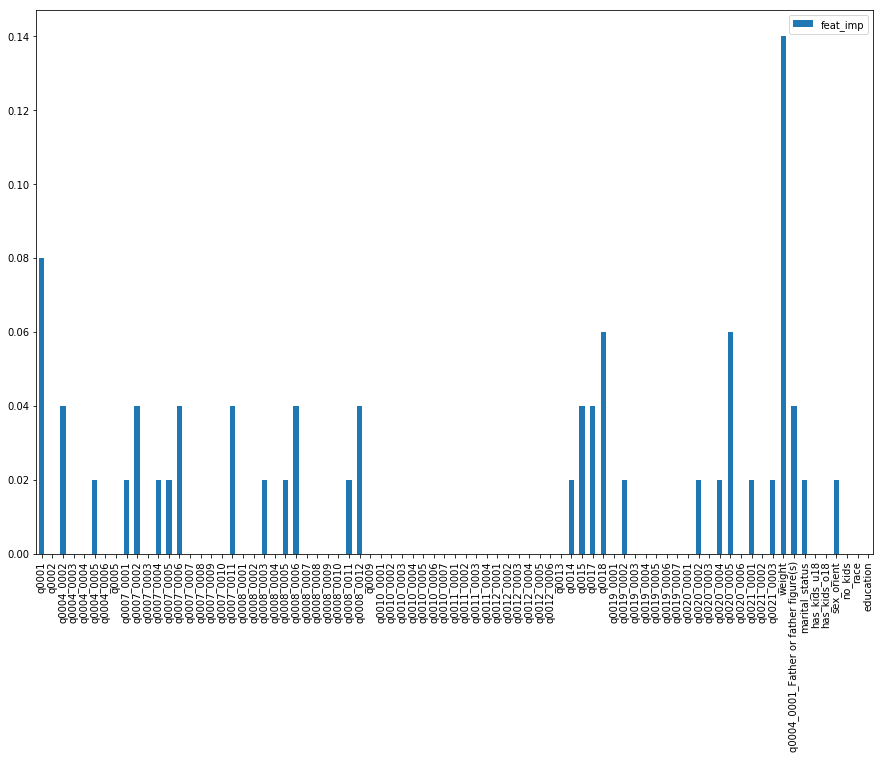

In [53]:
feat_importances.plot(kind='bar', figsize=(15, 10));

In [ ]:
# ada_params = {'n_estimators':[40, 45, 50, 55, 60],
#               'base_estimator':['ada'],
#               'algorithm':["SAMME"],      #'extra_tree', 'rf','gb', 'nb', 'lr'
#               'learning_rate':[.9, 1.0]}

#ada_params = {'n_estimators':[40, 45, 50, 55, 60]}

#gs = GridSearchCV(ada, param_grid=ada_params)

#gs.fit(X_train, y_train)

In [ ]:
#gs = GridSearchCV(ada, param_grid=ada_params)

#gs.fit(X_train, y_train)

In [48]:
nb_model = nb.fit(X_train, y_train)

In [49]:
predictions = nb_model.predict(X_test)

In [51]:
nb_model.score(X_train, y_train)

0.8629232039636664

In [52]:
nb_model.score(X_test, y_test)

0.8391089108910891

In [55]:
confusion_matrix(y_test, predictions)

array([[328,   0,  33],
       [  7,   0,   0],
       [ 24,   1,  11]])

In [58]:
y_test.shape, predictions.shape

((404,), (404,))

In [61]:
predictions

<function ndarray.sort>

In [62]:
X.to_csv('features_df.csv', encoding = 'UTF8')

In [63]:
y.to_csv('target_var.csv', encoding = 'UTF8')

In [64]:
y.head()

0           No
1           No
2           No
3    No answer
4           No
Name: q0022, dtype: object